# Is There a Cat in the Dat ? ( Kernel 2 )
By : Hesham Asem

______

after using LGB Model & gaining only 77% accuracy , let's try using OneHotEncoder method then Logistic Regression 

let's start by importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

then read the data

In [2]:
train = pd.read_csv('../input/cat-in-the-dat/train.csv')  
test = pd.read_csv('../input/cat-in-the-dat/test.csv')  

print(f'Train data Shape is {train.shape}')
print(f'Test data Shape is {test.shape}')

Train data Shape is (300000, 25)
Test data Shape is (200000, 24)


300K sample size for training & 200K for testing , great . 

now to define needed functions

In [3]:
def Drop(feature) :
    global data
    data.drop([feature],axis=1, inplace=True)
    data.head()
    
def UniqueAll(show_value = True) : 
    global data
    for col in data.columns : 
        print(f'Length of unique data for   {col}   is    {len(data[col].unique())} ')
        if show_value == True  : 
            print(f'unique values ae {data[col].unique()}' )
            print('-----------------------------')
            
def Encoder(feature , new_feature, drop = True) : 
    global data
    enc  = LabelEncoder()
    enc.fit(data[feature])
    data[new_feature] = enc.transform(data[feature])
    if drop == True : 
        data.drop([feature],axis=1, inplace=True)
        
def CPlot(feature) : 
    global data
    sns.countplot(x=feature, data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
    
def Mapp(feature , new_feature ,f_dict, drop_feature = True) : 
    global data
    data[new_feature] = data[feature].map(f_dict)
    if drop_feature == True : 
        data.drop([feature],axis=1, inplace=True)
    else :
        data.head()
def Unique(feature) : 
    global data
    print(f'Number of unique vaure are {len(list(data[feature].unique()))} which are : \n {list(data[feature].unique())}')

____

as usual , start with heading data to have a look to it 

In [4]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


& here is test data

In [5]:
test.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
1,300001,0,0,0,T,N,Red,Square,Lion,Canada,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
2,300002,1,0,1,F,Y,Blue,Square,Dog,China,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
3,300003,0,0,1,T,Y,Red,Star,Cat,China,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
4,300004,0,1,1,F,N,Red,Trapezoid,Dog,China,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11


____

# Forming the Data

since this example depend on categorical data , we have to slice features (X) from output (y) from training data , then concatenate X from training data to features from text data . 

& this step to make same data processing (like label encoder & so ) for all features 

so first to slice X_train & X_test

In [6]:
X_train = train.drop(['id' , 'target'], axis=1, inplace=False)
X_test = test.drop(['id'], axis=1, inplace=False)

X_train.shape , X_test.shape

((300000, 23), (200000, 23))

now to concatenate them together into X

In [7]:
X = pd.concat([X_train , X_test])
del X_train
del X_test
X.shape

(500000, 23)

how it looks ? 

In [8]:
X.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8


______

# Data Processing


no we'll call it data , so it be suitable for all functions we define , which depend on global data

In [9]:
data = X

now for plotting some features , to be sure its values are well represented

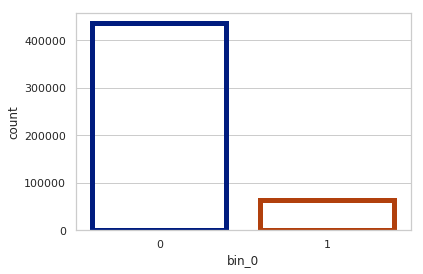

In [10]:
CPlot('bin_0')

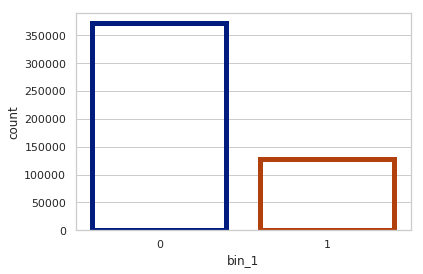

In [11]:
CPlot('bin_1')

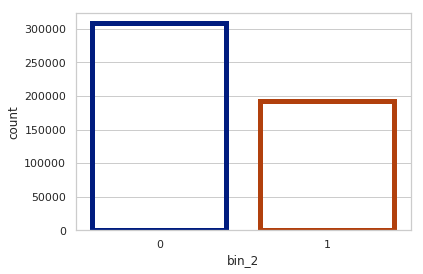

In [12]:
CPlot('bin_2')

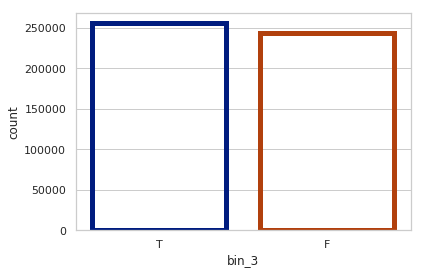

In [13]:
CPlot('bin_3')

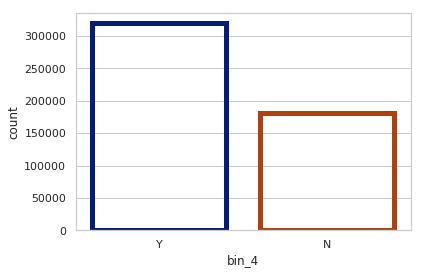

In [14]:
CPlot('bin_4')

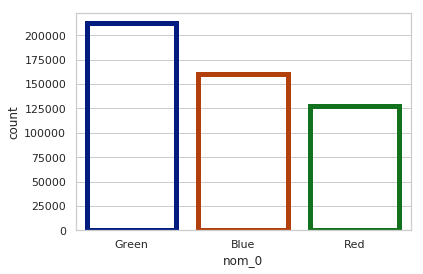

In [15]:
CPlot('nom_0')

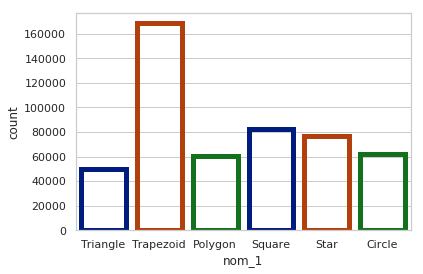

In [16]:
CPlot('nom_1')

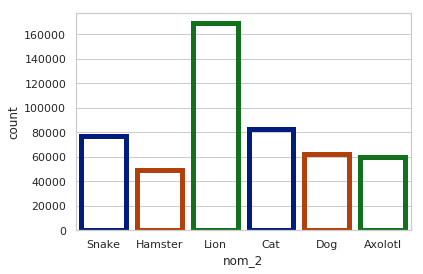

In [17]:
CPlot('nom_2')

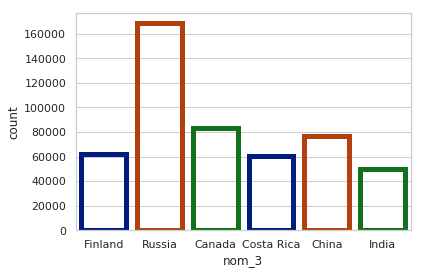

In [18]:
CPlot('nom_3')

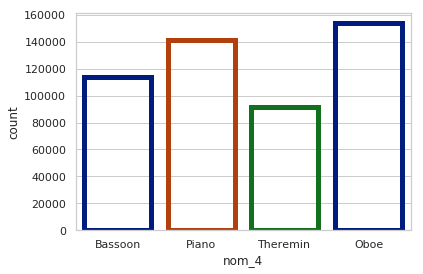

In [19]:
CPlot('nom_4')

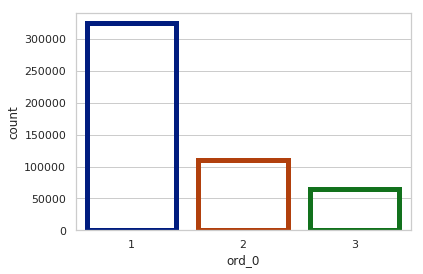

In [20]:
CPlot('ord_0')

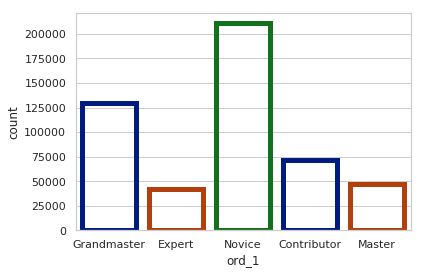

In [21]:
CPlot('ord_1')

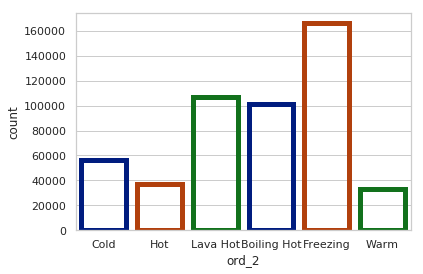

In [22]:
CPlot('ord_2')

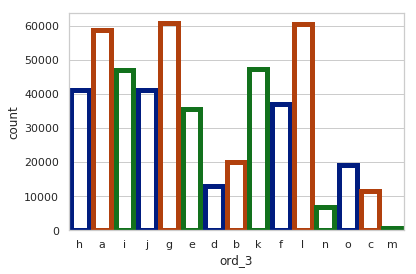

In [23]:
CPlot('ord_3')

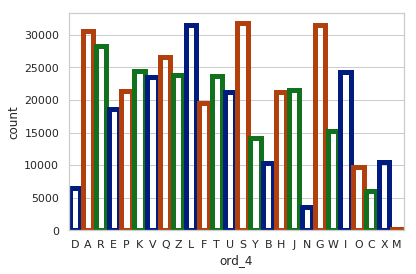

In [24]:
CPlot('ord_4')

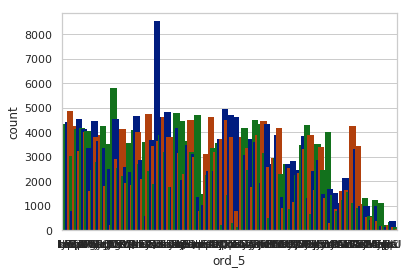

In [25]:
CPlot('ord_5')

so now we are ready for Build the model & train the data 

______

# Build the Model

first to prepare the data for training by defining trainging & testing data again 


In [26]:
data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8


_____


now to use OneHotEncoder to transform the whole data into data_dummies

In [27]:
OHE  = OneHotEncoder()
data_dummies = OHE.fit_transform(data)

what is the shape ? 

In [28]:
data_dummies.shape

(500000, 16552)

great , now to redefine train_data & test_data

In [29]:
train_data = data_dummies[:train.shape[0],:]
test_data=  data_dummies[train.shape[0]:,:]
train_data.shape , test_data.shape

((300000, 16552), (200000, 16552))

and now to define X & y 

In [30]:
X = train_data
y = train['target']
X.shape , y.shape

((300000, 16552), (300000,))

then to split it into training & testing data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (240000, 16552)
X_test shape is  (60000, 16552)
y_train shape is  (240000,)
y_test shape is  (60000,)


now we can use Logistic Regression Model to traing our data

In [32]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='lbfgs',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=33, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

how is the accuracy ? 

In [33]:
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))

LogisticRegressionModel Train Score is :  0.7841541666666667
LogisticRegressionModel Test Score is :  0.7614666666666666


although ccuracy here is about 76% , but it make a better score at the real test data which is about 80%


_____

now to predict test data , but first we have to apply same scaler model to test data

ok , now predicting testing data , using predic_proba method , to calculate the probability of having a cat 

In [34]:
y_pred = LogisticRegressionModel.predict_proba(test_data)
y_pred.shape

(200000, 2)

how it looks like ? 

In [35]:
y_pred[:,1]

array([0.28054145, 0.62117349, 0.12910245, ..., 0.26648226, 0.66129182,
       0.16569432])

great , now to open sample_submission , to read id columns from it

In [36]:
data = pd.read_csv('../input/cat-in-the-dat/sample_submission.csv')  

print(f'Test data Shape is {data.shape}')
data.head()

Test data Shape is (200000, 2)


,id,target
0,300000,0.5
1,300001,0.5
2,300002,0.5
3,300003,0.5
4,300004,0.5


at last we concatenate id column with the result

In [37]:
idd = data['id']
FinalResults = pd.DataFrame(y_pred[:,1],columns= ['target'])
FinalResults.insert(0,'id',idd)
FinalResults.head()

,id,target
0,300000,0.280541
1,300001,0.621173
2,300002,0.129102
3,300003,0.389493
4,300004,0.898266


& export the result file

In [38]:
FinalResults.to_csv("sample_submission.csv",index=False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

_____

hope you find it helpful !